<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-component-analysis-(PCA)-in-scikit-learn" data-toc-modified-id="Principal-component-analysis-(PCA)-in-scikit-learn-1">Principal component analysis (PCA) in scikit-learn</a></span></li><li><span><a href="#Visually-compare-original-data-to-components" data-toc-modified-id="Visually-compare-original-data-to-components-2">Visually compare original data to components</a></span></li></ul></div>

Principal component analysis (PCA) in scikit-learn
-----

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from warnings import filterwarnings
filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [3]:
# Let's try it our favorite dataset
from sklearn.datasets import load_iris

# We just need the data (no need for targets)
X = load_iris().data

Documentation for [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [1]:
from sklearn.preprocessing import StandardScaler

In [4]:
# TODO: Standardized dataset




In [5]:
# A solution
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [6]:
# Double check standardization
assert np.isclose(np.mean(X_std), 0)
assert np.isclose(np.std(X_std), 1)

Documentation for [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [7]:
from sklearn.decomposition import PCA

In [8]:
# TODO: Fit multiple PCAs with the following number of components: [1, 2, 3, 4] 



In [9]:
# A solution
results = {}
for n_components in range(1, 5):
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_std);
    results[n_components] = pca

In [10]:
# TODO:
# Visually inspect the percentage of variance accounted for as a funciton of the number of components.
# What happens as there are more components? 
# In particular, how do the smaller principal components change as more components are added?
# How much variance is accounted for when the number of compenents is 4? What does that mean?




[0.72962445]
[0.72962445 0.22850762]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]
The 100% variance explained when number of components equal p.


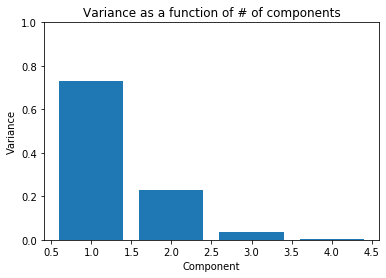

In [11]:
# A solution
for pca_current in results.values():
    print(pca_current.explained_variance_ratio_)
    
# We get dimnishing returns 
plt.bar(x=[1, 2, 3, 4], height=pca_current.explained_variance_ratio_);
plt.title("Variance as a function of # of components");plt.ylim(top=1);plt.xlabel("Component");plt.ylabel("Variance")

# Since the components are orthogonal, the variance is unique and it sums to one (or close enough) when it equals p.
print(f"The {sum(results[4].explained_variance_ratio_):.0%} variance explained when number of components equal p.")

Visually compare original data to components
-----

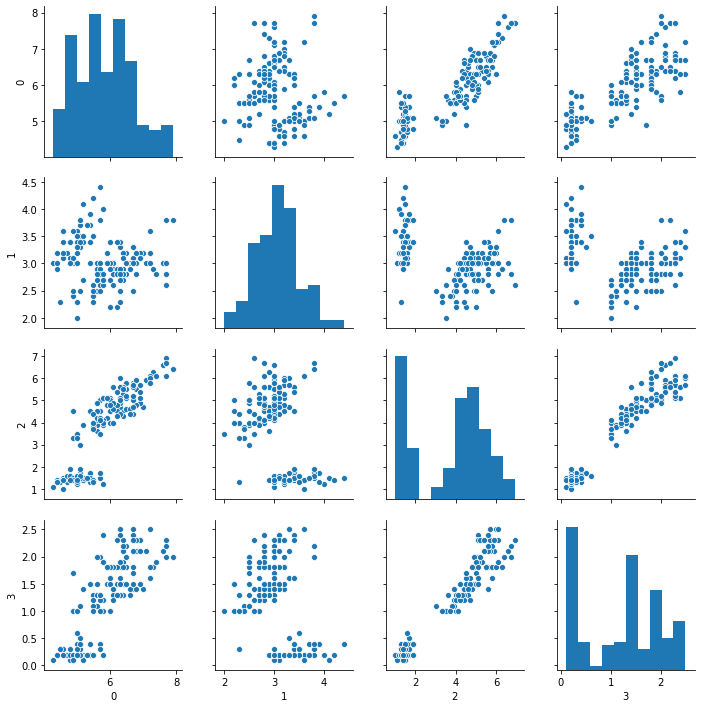

In [12]:
# Pretty plot the original data
sns.pairplot(pd.DataFrame(X), size=2.5, palette=palette);

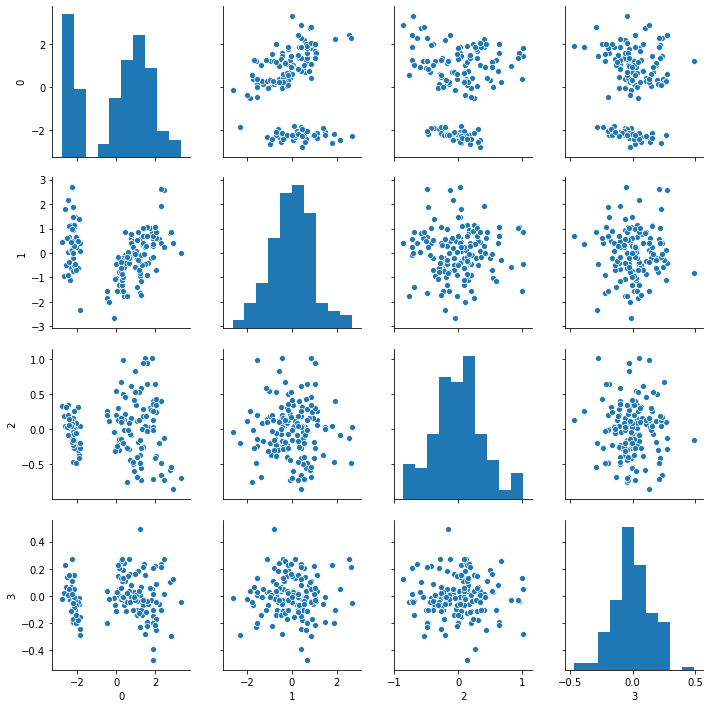

In [13]:
# Pretty plot the components
X_pca_transform = pca.transform(X_std)
sns.pairplot(pd.DataFrame(X_pca_transform), size=2.5, palette=palette);